In [1]:
# !pip install tensorflow 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# scaling of values
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4671 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2725 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2664 - accuracy: 0.9251


In [7]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2710 - accuracy: 0.9254


[0.270975261926651, 0.9254000186920166]

In [8]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.84895802e-02, 3.52762299e-07, 6.39015436e-02, 9.65934157e-01,
       2.69433856e-03, 1.17468923e-01, 1.67494011e-06, 9.99787807e-01,
       1.12243116e-01, 6.23951375e-01], dtype=float32)

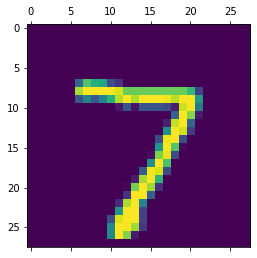

In [9]:
plt.matshow(X_test[0])

In [10]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [11]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   9,    9,  913,   17,    9,    3,   12,   10,   47,    3],
       [   4,    0,   18,  923,    0,   20,    2,   10,   26,    7],
       [   2,    1,    2,    1,  923,    0,   11,    3,   10,   29],
       [  12,    3,    2,   39,   11,  765,   14,    7,   34,    5],
       [  15,    3,    4,    1,    7,   10,  913,    2,    3,    0],
       [   2,    6,   21,    9,   10,    0,    0,  944,    5,   31],
       [   8,    7,    5,   17,    9,   18,    8,   10,  885,    7],
       [  11,    7,    1,    9,   37,    6,    0,   18,   10,  910]])>

Text(69.0, 0.5, 'Truth')

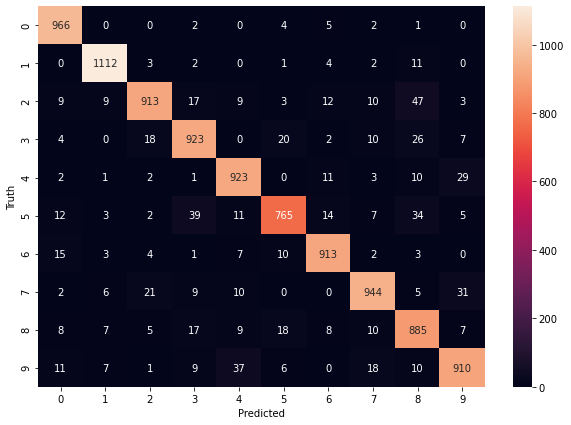

In [12]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2710 - accuracy: 0.9254


[0.270975261926651, 0.9254000186920166]

Text(69.0, 0.5, 'Truth')

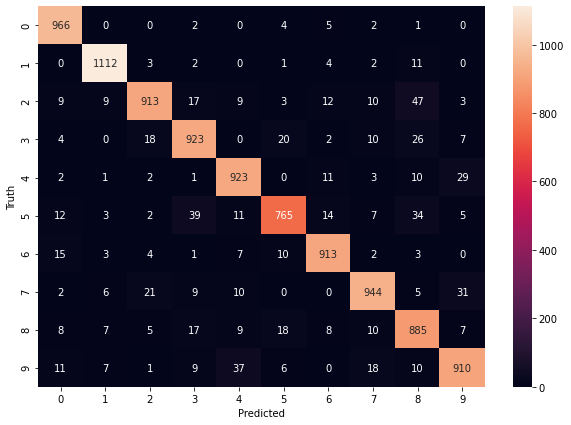

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

using keras for flattening


In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2744 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9840


In [16]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0773 - accuracy: 0.9747


[0.07732684165239334, 0.9746999740600586]

In [17]:
%load_ext tensorboard
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 10096), started 0:05:16 ago. (Use '!kill 10096' to kill it.)